In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv('/Users/carterhogan/CaseStudies/world_value_survey/analysis/data/wvs/wave7.csv')

/var/folders/k9/j4977wt918z9ns7wk6kqfmqm0000gn/T/ipykernel_1878/3076787279.py:10: DtypeWarning: Columns (582,583,584) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/carterhogan/CaseStudies/world_value_survey/analysis/data/wvs/wave7.csv')


In [2]:
# create a subset of relevant features
subset =  df.iloc[:, 618:]

Plot Ideas:
    - new income variable
    - new political dummies
    - fix distrust by age, (make it cleaner)
    - correlation plot of used features

In [3]:


avg_values_by_income = df.groupby('Q240')[['base_distrust_index', 'national_distrust_index', 'international_distrust_index', 'migration_positive','migration_negative','education']].mean().reset_index()


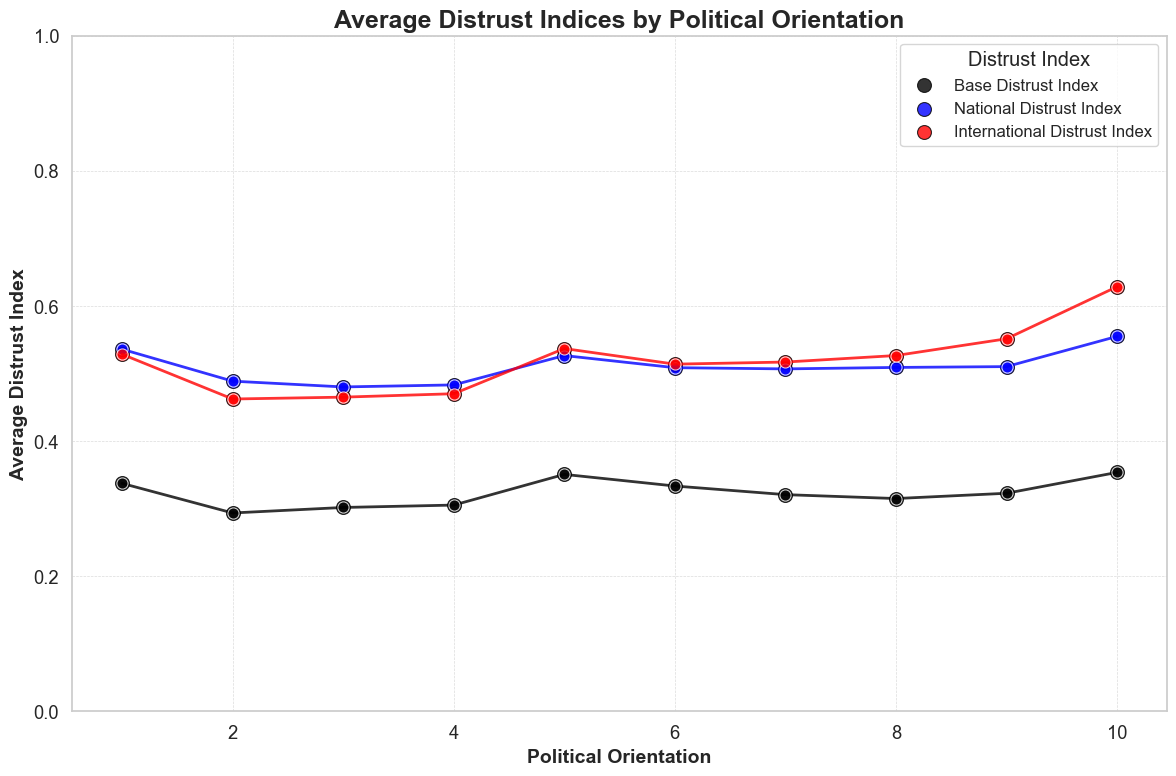

In [4]:
# Set Seaborn style for better visuals
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

# Create the scatter plot
plt.figure(figsize=(12, 8))

# Scatter plot for base_distrust_index
sns.scatterplot(x='Q240', y='base_distrust_index', data=avg_values_by_income, 
                color='black', s=100, marker='o', edgecolor='black', alpha=0.8, label='Base Distrust Index')

# Scatter plot for national_distrust_index
sns.scatterplot(x='Q240', y='national_distrust_index', data=avg_values_by_income, 
                color='blue', s=100, marker='o', edgecolor='black', alpha=0.8, label='National Distrust Index')

# Scatter plot for international_distrust_index
sns.scatterplot(x='Q240', y='international_distrust_index', data=avg_values_by_income, 
                color='red', s=100, marker='o', edgecolor='black', alpha=0.8, label='International Distrust Index')

# Add lines to connect the points for each index
sns.lineplot(x='Q240', y='base_distrust_index', data=avg_values_by_income, 
             color='black', marker='o', linestyle='-', linewidth=2, markersize=8, alpha=0.8)
sns.lineplot(x='Q240', y='national_distrust_index', data=avg_values_by_income, 
             color='blue', marker='o', linestyle='-', linewidth=2, markersize=8, alpha=0.8)
sns.lineplot(x='Q240', y='international_distrust_index', data=avg_values_by_income, 
             color='red', marker='o', linestyle='-', linewidth=2, markersize=8, alpha=0.8)

# Add title and axis labels with custom fonts
plt.title('Average Distrust Indices by Political Orientation', fontsize=18, fontweight='bold')
plt.xlabel('Political Orientation', fontsize=14, fontweight='bold')
plt.ylabel('Average Distrust Index', fontsize=14, fontweight='bold')


# Add a grid for better readability
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Add a legend
plt.legend(title='Distrust Index', fontsize=12)
plt.ylim(top = 1, bottom = 0)
# Show the plot
plt.tight_layout()
plt.show()

/var/folders/k9/j4977wt918z9ns7wk6kqfmqm0000gn/T/ipykernel_2709/3989487364.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_trust_by_age = subset.groupby('age_group')[['base_distrust_index', 'national_distrust_index', 'international_distrust_index']].mean().reset_index()


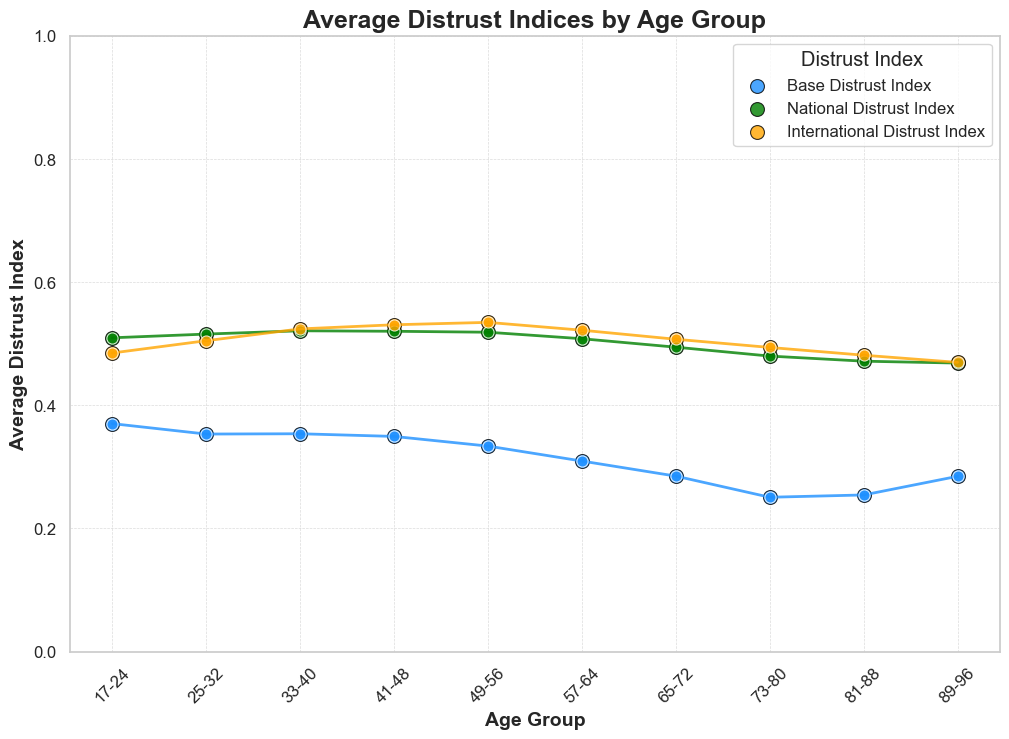

In [ ]:
age_bins = pd.cut(subset['age'], bins=range(17, 98, 8), right=False, labels=["17-24", "25-32", "33-40", "41-48", "49-56", "57-64", "65-72", "73-80", "81-88", "89-96"])

# Add a new column 'age_group' to store these bins
subset['age_group'] = age_bins

# Calculate the average trust indices for each age group
avg_trust_by_age = subset.groupby('age_group')[['base_distrust_index', 'national_distrust_index', 'international_distrust_index']].mean().reset_index()

# Set Seaborn style for better visuals
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

# Create the scatter plot
plt.figure(figsize=(12, 8))

# Scatter plot for base_distrust_index
sns.scatterplot(x='age_group', y='base_distrust_index', data=avg_trust_by_age, 
                color='dodgerblue', s=100, marker='o', edgecolor='black', alpha=0.8, label='Base Distrust Index')

# Scatter plot for national_distrust_index
sns.scatterplot(x='age_group', y='national_distrust_index', data=avg_trust_by_age, 
                color='green', s=100, marker='o', edgecolor='black', alpha=0.8, label='National Distrust Index')

# Scatter plot for international_distrust_index
sns.scatterplot(x='age_group', y='international_distrust_index', data=avg_trust_by_age, 
                color='orange', s=100, marker='o', edgecolor='black', alpha=0.8, label='International Distrust Index')

# Add lines to connect the points for each index
sns.lineplot(x='age_group', y='base_distrust_index', data=avg_trust_by_age, 
             color='dodgerblue', marker='o', linestyle='-', linewidth=2, markersize=8, alpha=0.8)
sns.lineplot(x='age_group', y='national_distrust_index', data=avg_trust_by_age, 
             color='green', marker='o', linestyle='-', linewidth=2, markersize=8, alpha=0.8)
sns.lineplot(x='age_group', y='international_distrust_index', data=avg_trust_by_age, 
             color='orange', marker='o', linestyle='-', linewidth=2, markersize=8, alpha=0.8)

# Add title and axis labels with custom fonts
plt.title('Average Distrust Indices by Age Group', fontsize=18, fontweight='bold')
plt.xlabel('Age Group', fontsize=14, fontweight='bold')
plt.ylabel('Average Distrust Index', fontsize=14, fontweight='bold')

# Adjust tick labels
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12, )

# Add a grid for better readability
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Add a legend
plt.legend(title='Distrust Index', fontsize=12)
plt.ylim(top = 1, bottom = 0)

# Show the plot
plt.show()



In [33]:
# boxplots of average distrust by income group 

In [34]:
ref_dummy_for_pol_ref = 5
regressors = [# corruption
              "group_corruption",
              
              # migration
              "is_immigrant",
              "mother_immigrant",
              "father_immigrant",
              "migration_positive",
              "migration_negative",
              
              # political preference
              *[f"pol_value_{i}" for i in range(1,11) if i != ref_dummy_for_pol_ref],
              
              # hardships and security
              "hardships_questions",
              "security_neighborhood",
              "security_financial",
              "security_war",
              
              # demographics (including happiness)
              "age",
              "gender",
              "above_avg_inc",
              "happ__1",
              "happ__3",
              "happ__4"
              ]

X = df.loc[:, regressors]
y = df['national_distrust_index']
# Add a constant term to the model (for the intercept)
X_const = sm.add_constant(X)

# Fit OLS model with robust standard errors
ols_model_robust = sm.OLS(y, X_const).fit(cov_type='HC0')

# Print the regression results with robust standard errors
print(ols_model_robust.summary())

                               OLS Regression Results                              
Dep. Variable:     national_distrust_index   R-squared:                       0.230
Model:                                 OLS   Adj. R-squared:                  0.229
Method:                      Least Squares   F-statistic:                     109.0
Date:                     Mon, 10 Feb 2025   Prob (F-statistic):               0.00
Time:                             15:25:55   Log-Likelihood:                 6838.1
No. Observations:                    10712   AIC:                        -1.362e+04
Df Residuals:                        10686   BIC:                        -1.344e+04
Df Model:                               25                                         
Covariance Type:                       HC0                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

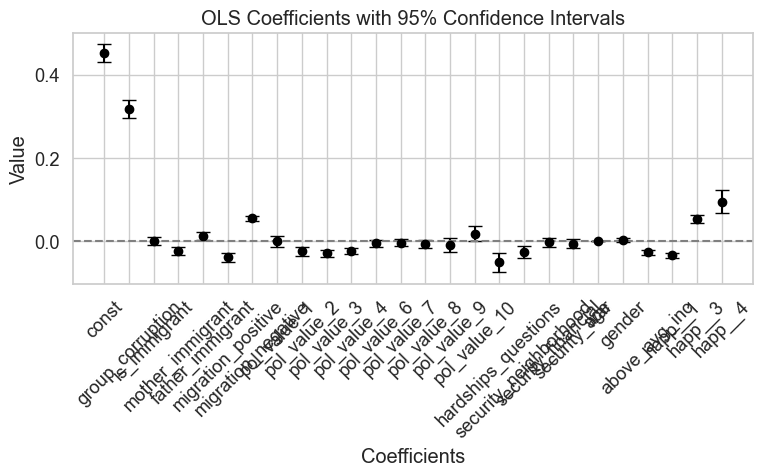

In [22]:
# Get the coefficients and their 95% confidence intervals
coef = ols_model_robust.params
conf_int = ols_model_robust.conf_int(alpha=0.05)  # 95% CI

# Plot the coefficients with their confidence intervals
plt.figure(figsize=(8, 5))
plt.errorbar(coef.index, coef, yerr=[coef - conf_int[0], conf_int[1] - coef], fmt='o', color='black', capsize=5)
plt.axhline(0, color='gray', linestyle='--')  # Zero reference line
plt.title("OLS Coefficients with 95% Confidence Intervals")
plt.xlabel("Coefficients")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


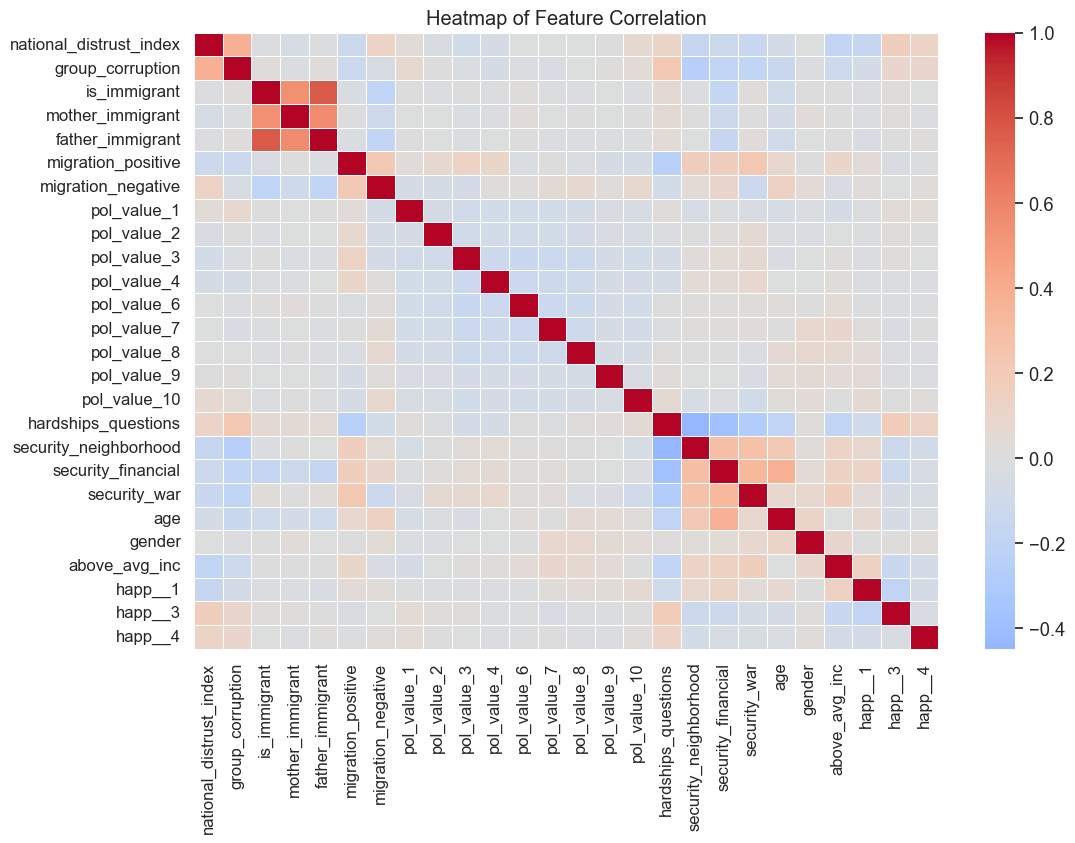

In [32]:
corr_plot = ["national_distrust_index",
              "group_corruption",
              # migration
              "is_immigrant",
              "mother_immigrant",
              "father_immigrant",
              "migration_positive",
              "migration_negative",
              
              # political preference
              *[f"pol_value_{i}" for i in range(1,11) if i != ref_dummy_for_pol_ref],
              
              # hardships and security
              "hardships_questions",
              "security_neighborhood",
              "security_financial",
              "security_war",
              
              # demographics (including happiness)
              "age",
              "gender",
              "above_avg_inc",
              "happ__1",
              "happ__3",
              "happ__4"
              ]

df_corr = df.loc[:,corr_plot]
plt.figure(figsize=(12, 8)) 
sns.heatmap(df_corr.corr(), annot=False, cmap="coolwarm", linewidths=0.5, center = 0)
# Change the font of the tick labels (variables)
plt.xticks(fontsize=12) # Change font and size for x-axis labels (variables)
plt.yticks(fontsize=12)  # Change font and size for y-axis labels (variables)

plt.title('Heatmap of Feature Correlation')
plt.show()

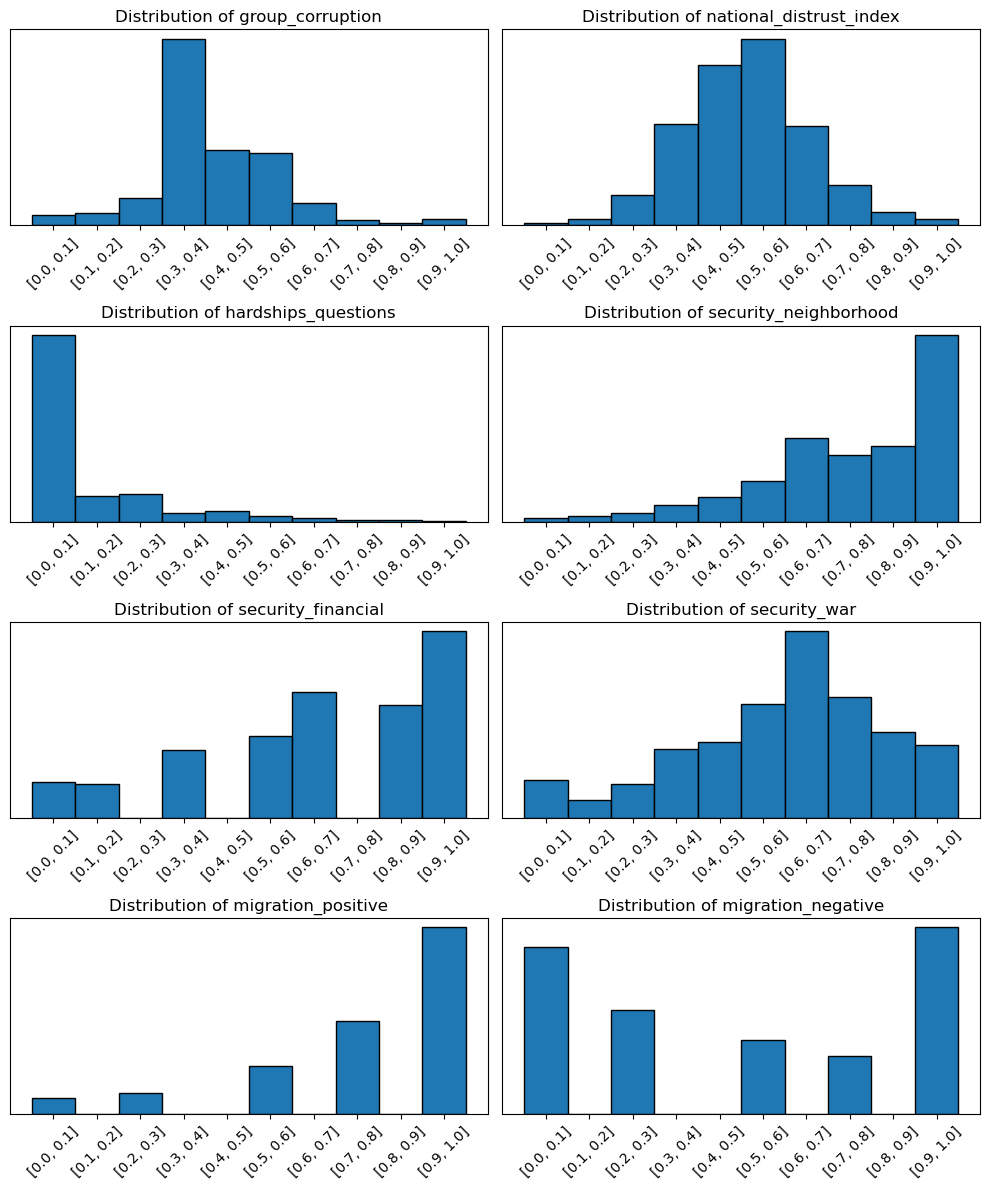

In [11]:
# the distributions of continuous variables

data = df.loc[:,['group_corruption','national_distrust_index','hardships_questions','security_neighborhood','security_financial','security_war','migration_positive','migration_negative']]

# Create counts for each variable (assuming discrete values for bar plot)
data_counts = {var: np.histogram(values, bins=10)[0] for var, values in data.items()}

# Set up a 4x2 grid of subplots
fig, axes = plt.subplots(4, 2, figsize=(10, 12))

# Flatten the axes for easier iteration
axes = axes.flatten()


# Loop through each variable and plot its histogram on the respective subplot
for i, (var, values) in enumerate(data.items()):
    # Calculate histogram with 10 bins
    counts, bin_edges = np.histogram(values, bins=10)
    
    # Calculate the center of each bin (middle of bin edges)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Plot the histogram with calculated bin edges
    axes[i].bar(bin_centers, counts, width=np.diff(bin_edges), align='center', edgecolor='black')

    # Set title
    axes[i].set_title(f'Distribution of {var}')
    
    # Set custom x-ticks as bin ranges with one decimal place
    bin_labels = [f'[{bin_edges[j]:.1f}, {bin_edges[j+1]:.1f}]' for j in range(len(bin_edges)-1)]
    axes[i].set_xticks(bin_centers)  # Set the ticks to bin centers
    axes[i].set_xticklabels(bin_labels, rotation=45, ha='center')  # Label the ticks with bin ranges

    # Set y-ticks and label them (optional)
    axes[i].set_yticks([])  # Hide y-axis ticks if desired
# Adjust layout
plt.tight_layout()
plt.show()
